In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import Image

In [3]:
import gdown
# download the data from g drive

url = "https://drive.google.com/file/d/1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_data.zip")

1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm


Downloading...
From: https://drive.google.com/uc?/export=download&id=1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm
To: /content/sign_data.zip
100%|██████████| 10.3M/10.3M [00:00<00:00, 30.6MB/s]


'sign_data.zip'

In [5]:
!unzip sign_data.zip /content/sign_data

Archive:  sign_data.zip
caution: filename not matched:  /content/sign_data


In [11]:
!mv /content/data.yaml /content/sign_data

In [13]:
!yolo task=detect mode=train data="/content/sign_data/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/sign_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

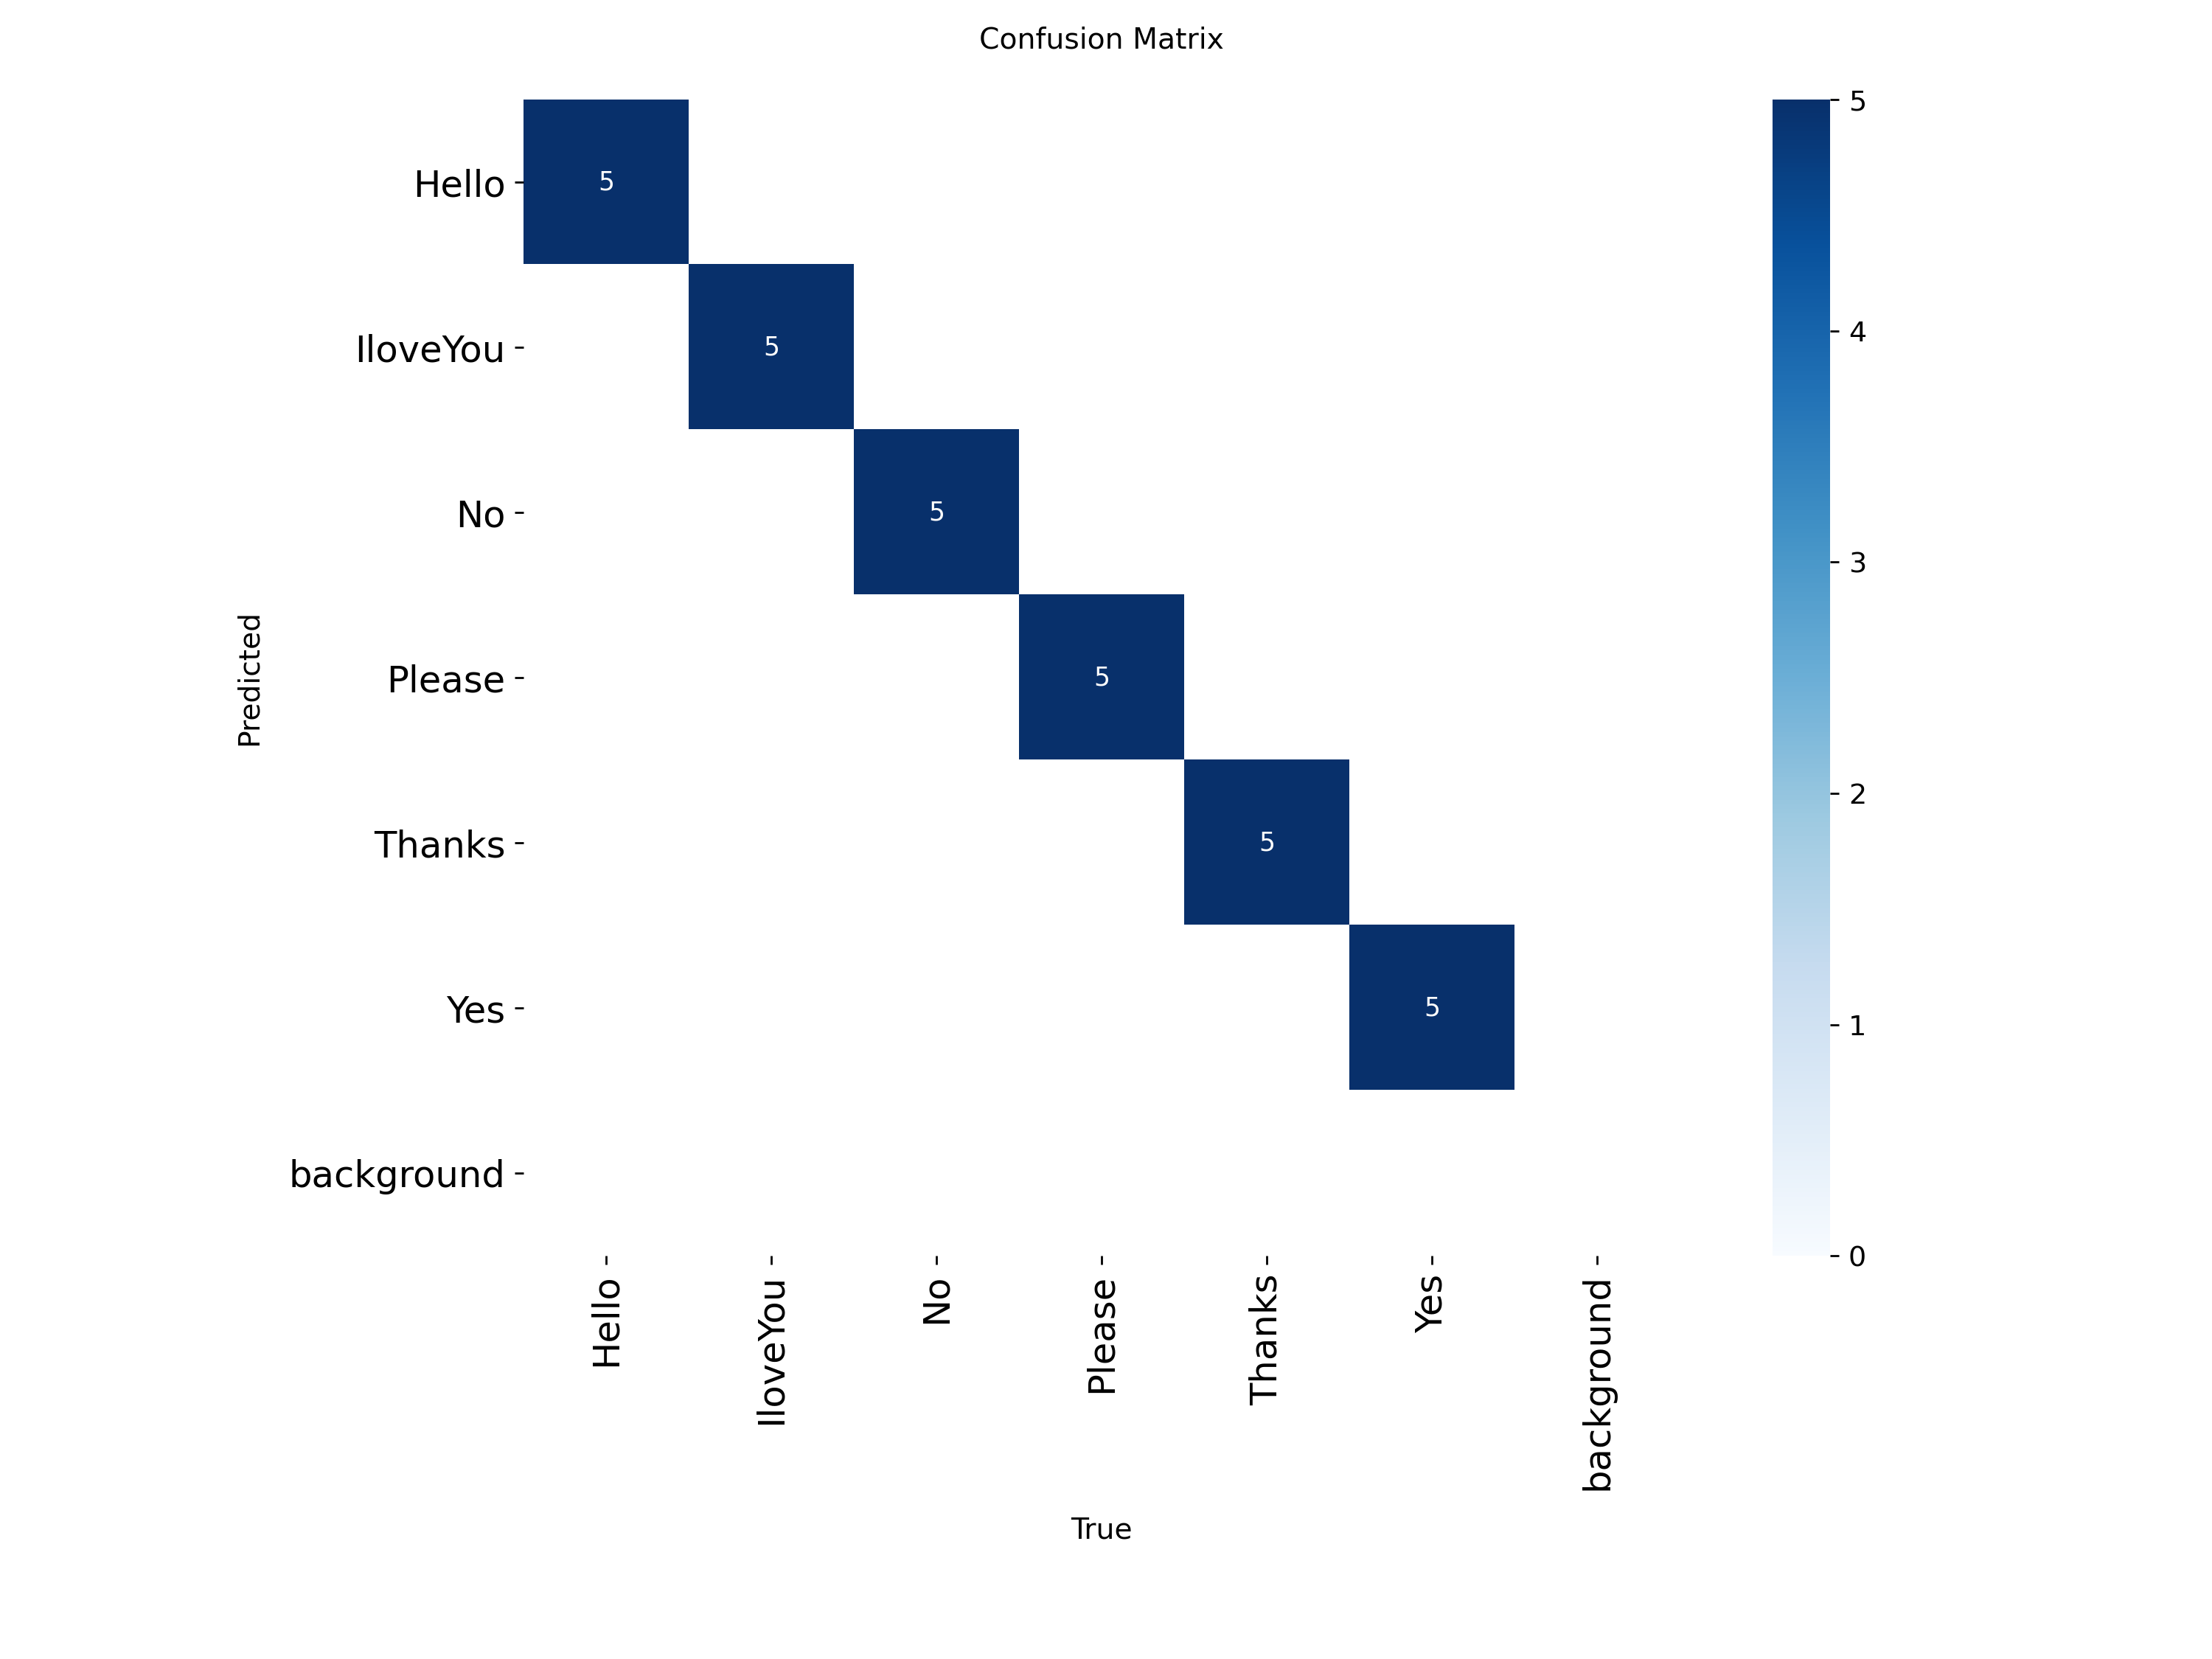

In [15]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

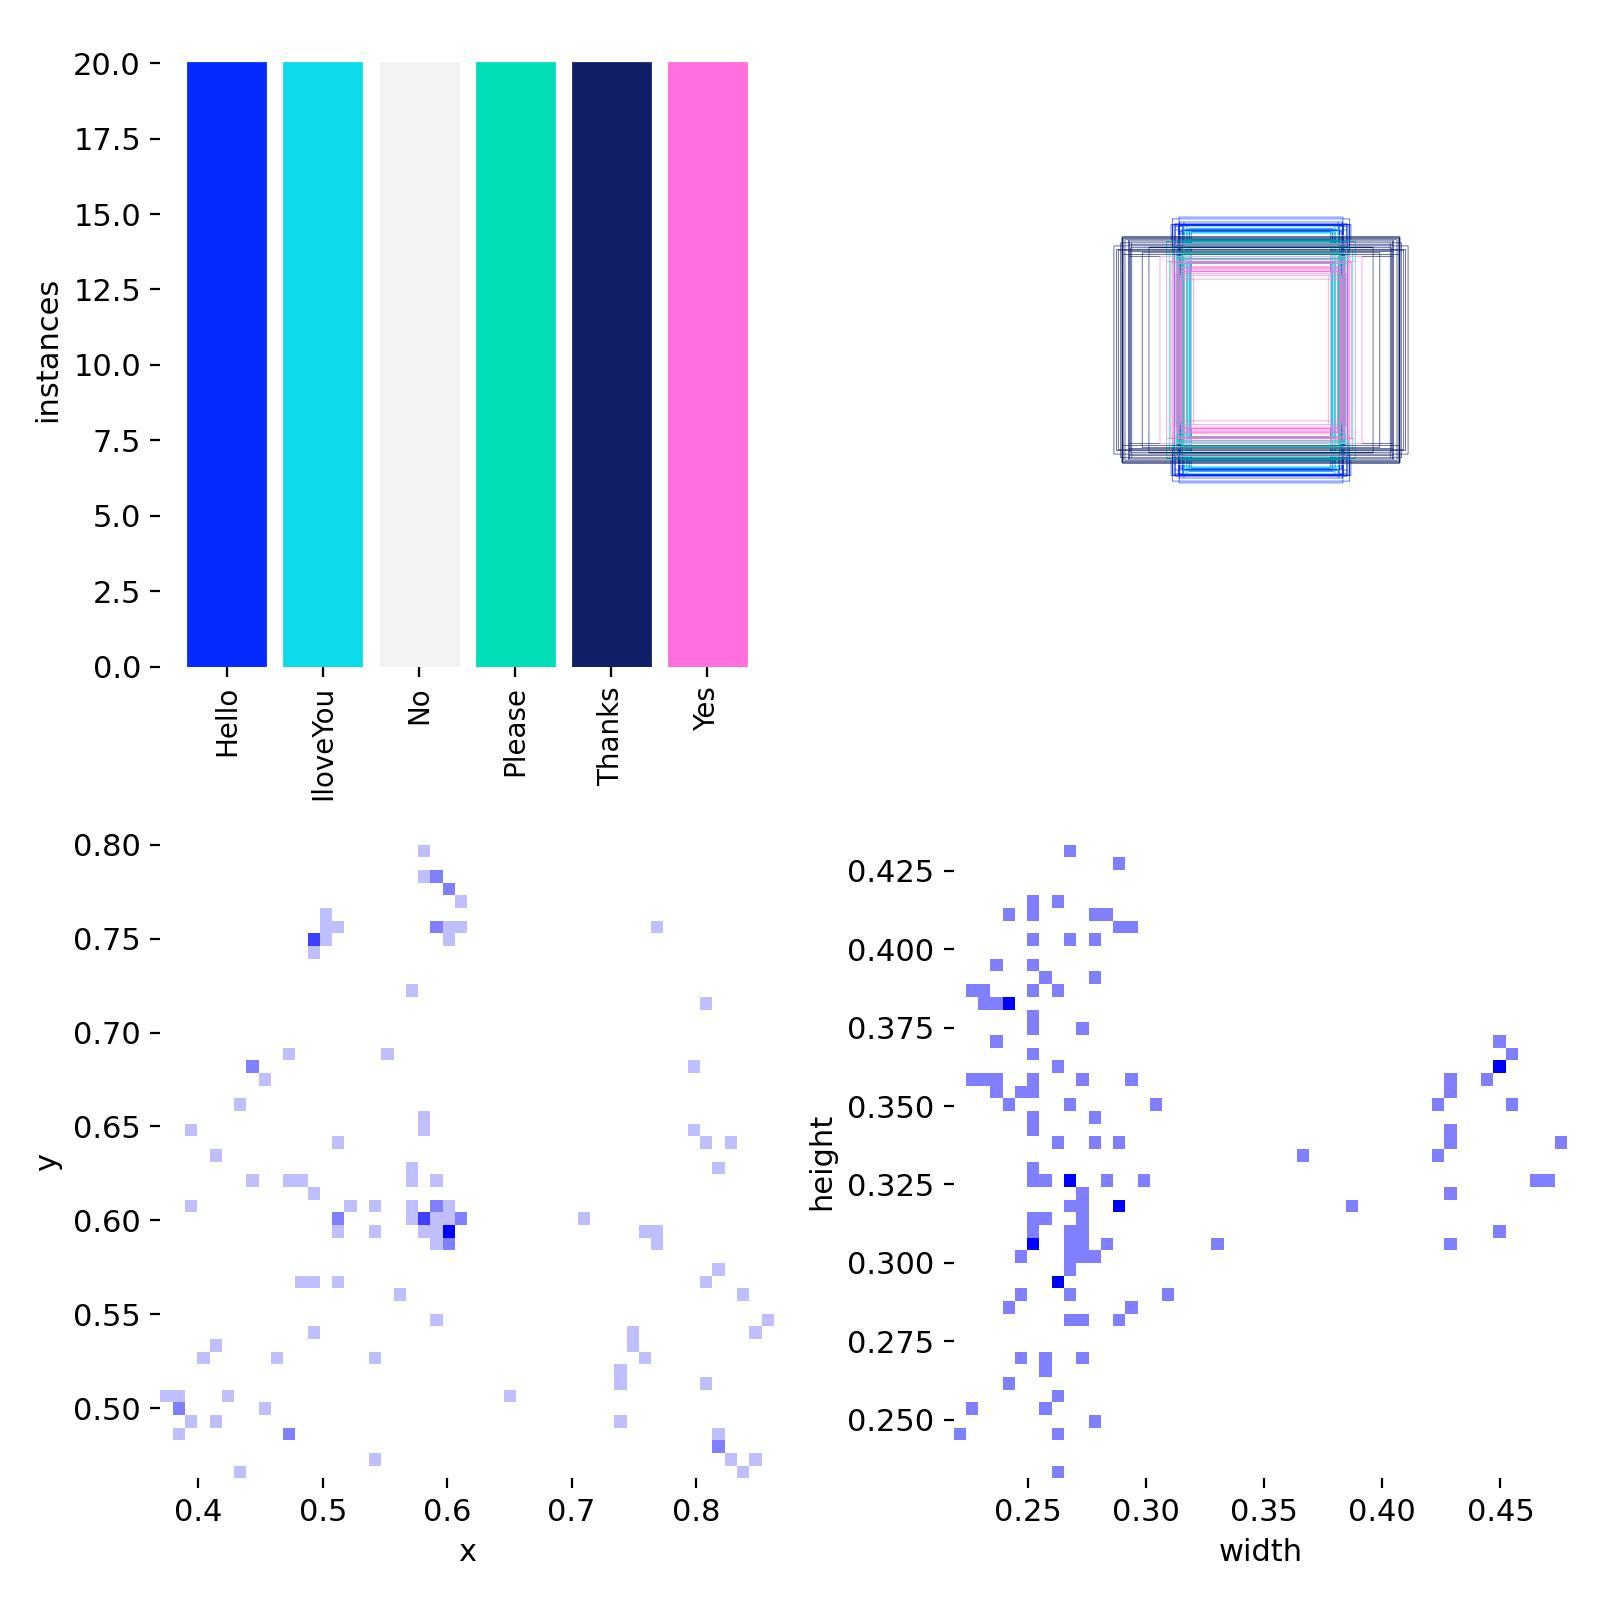

In [17]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

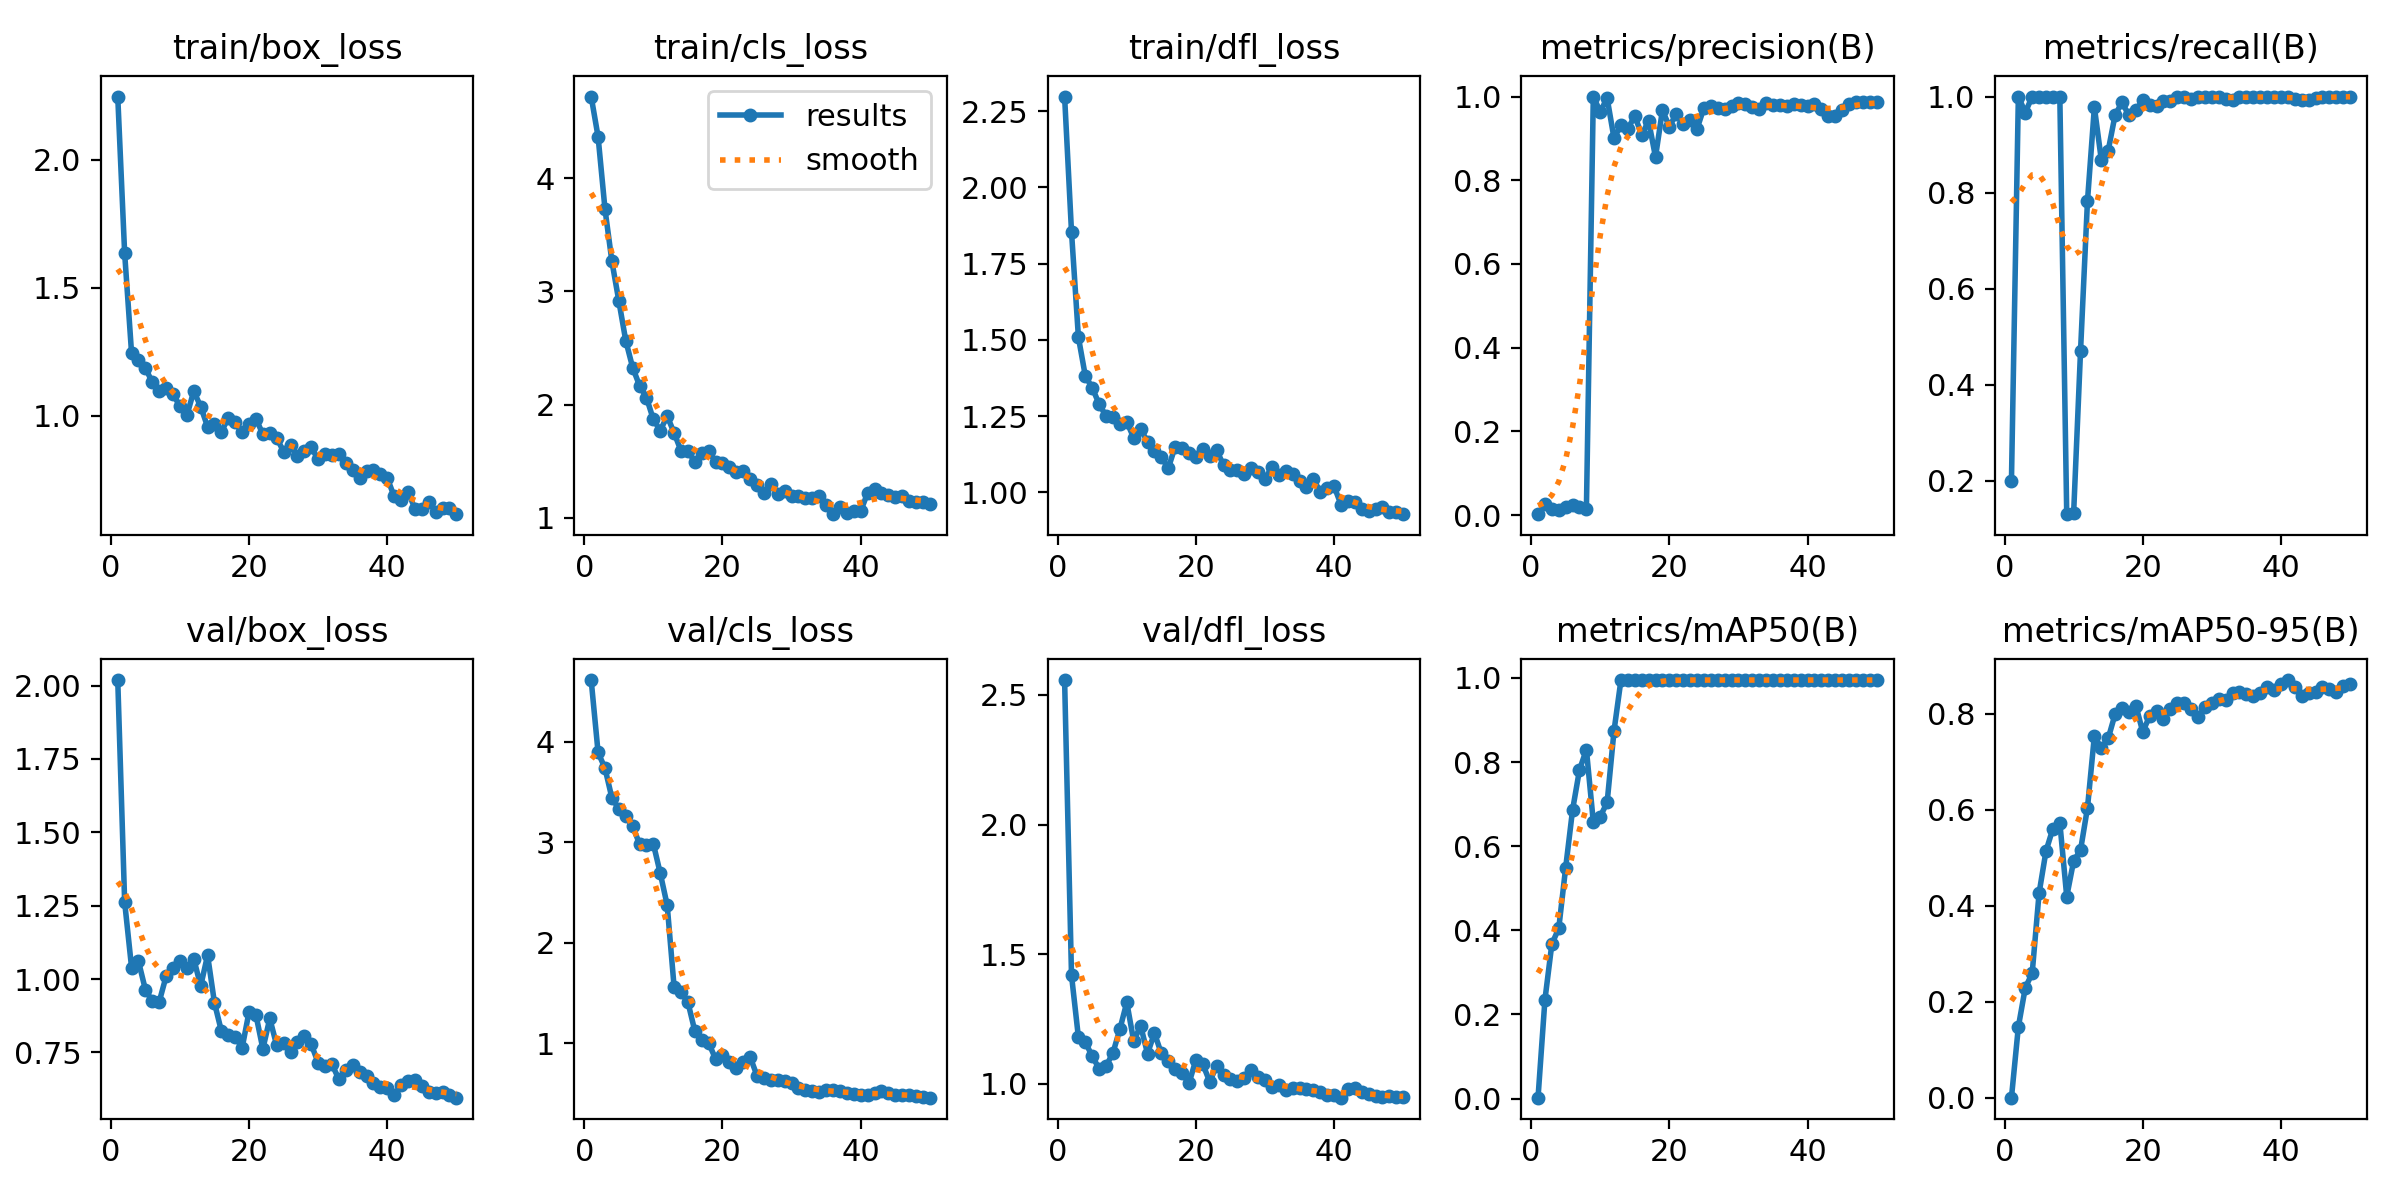

In [18]:
Image("/content/runs/detect/train2/results.png", width=600)

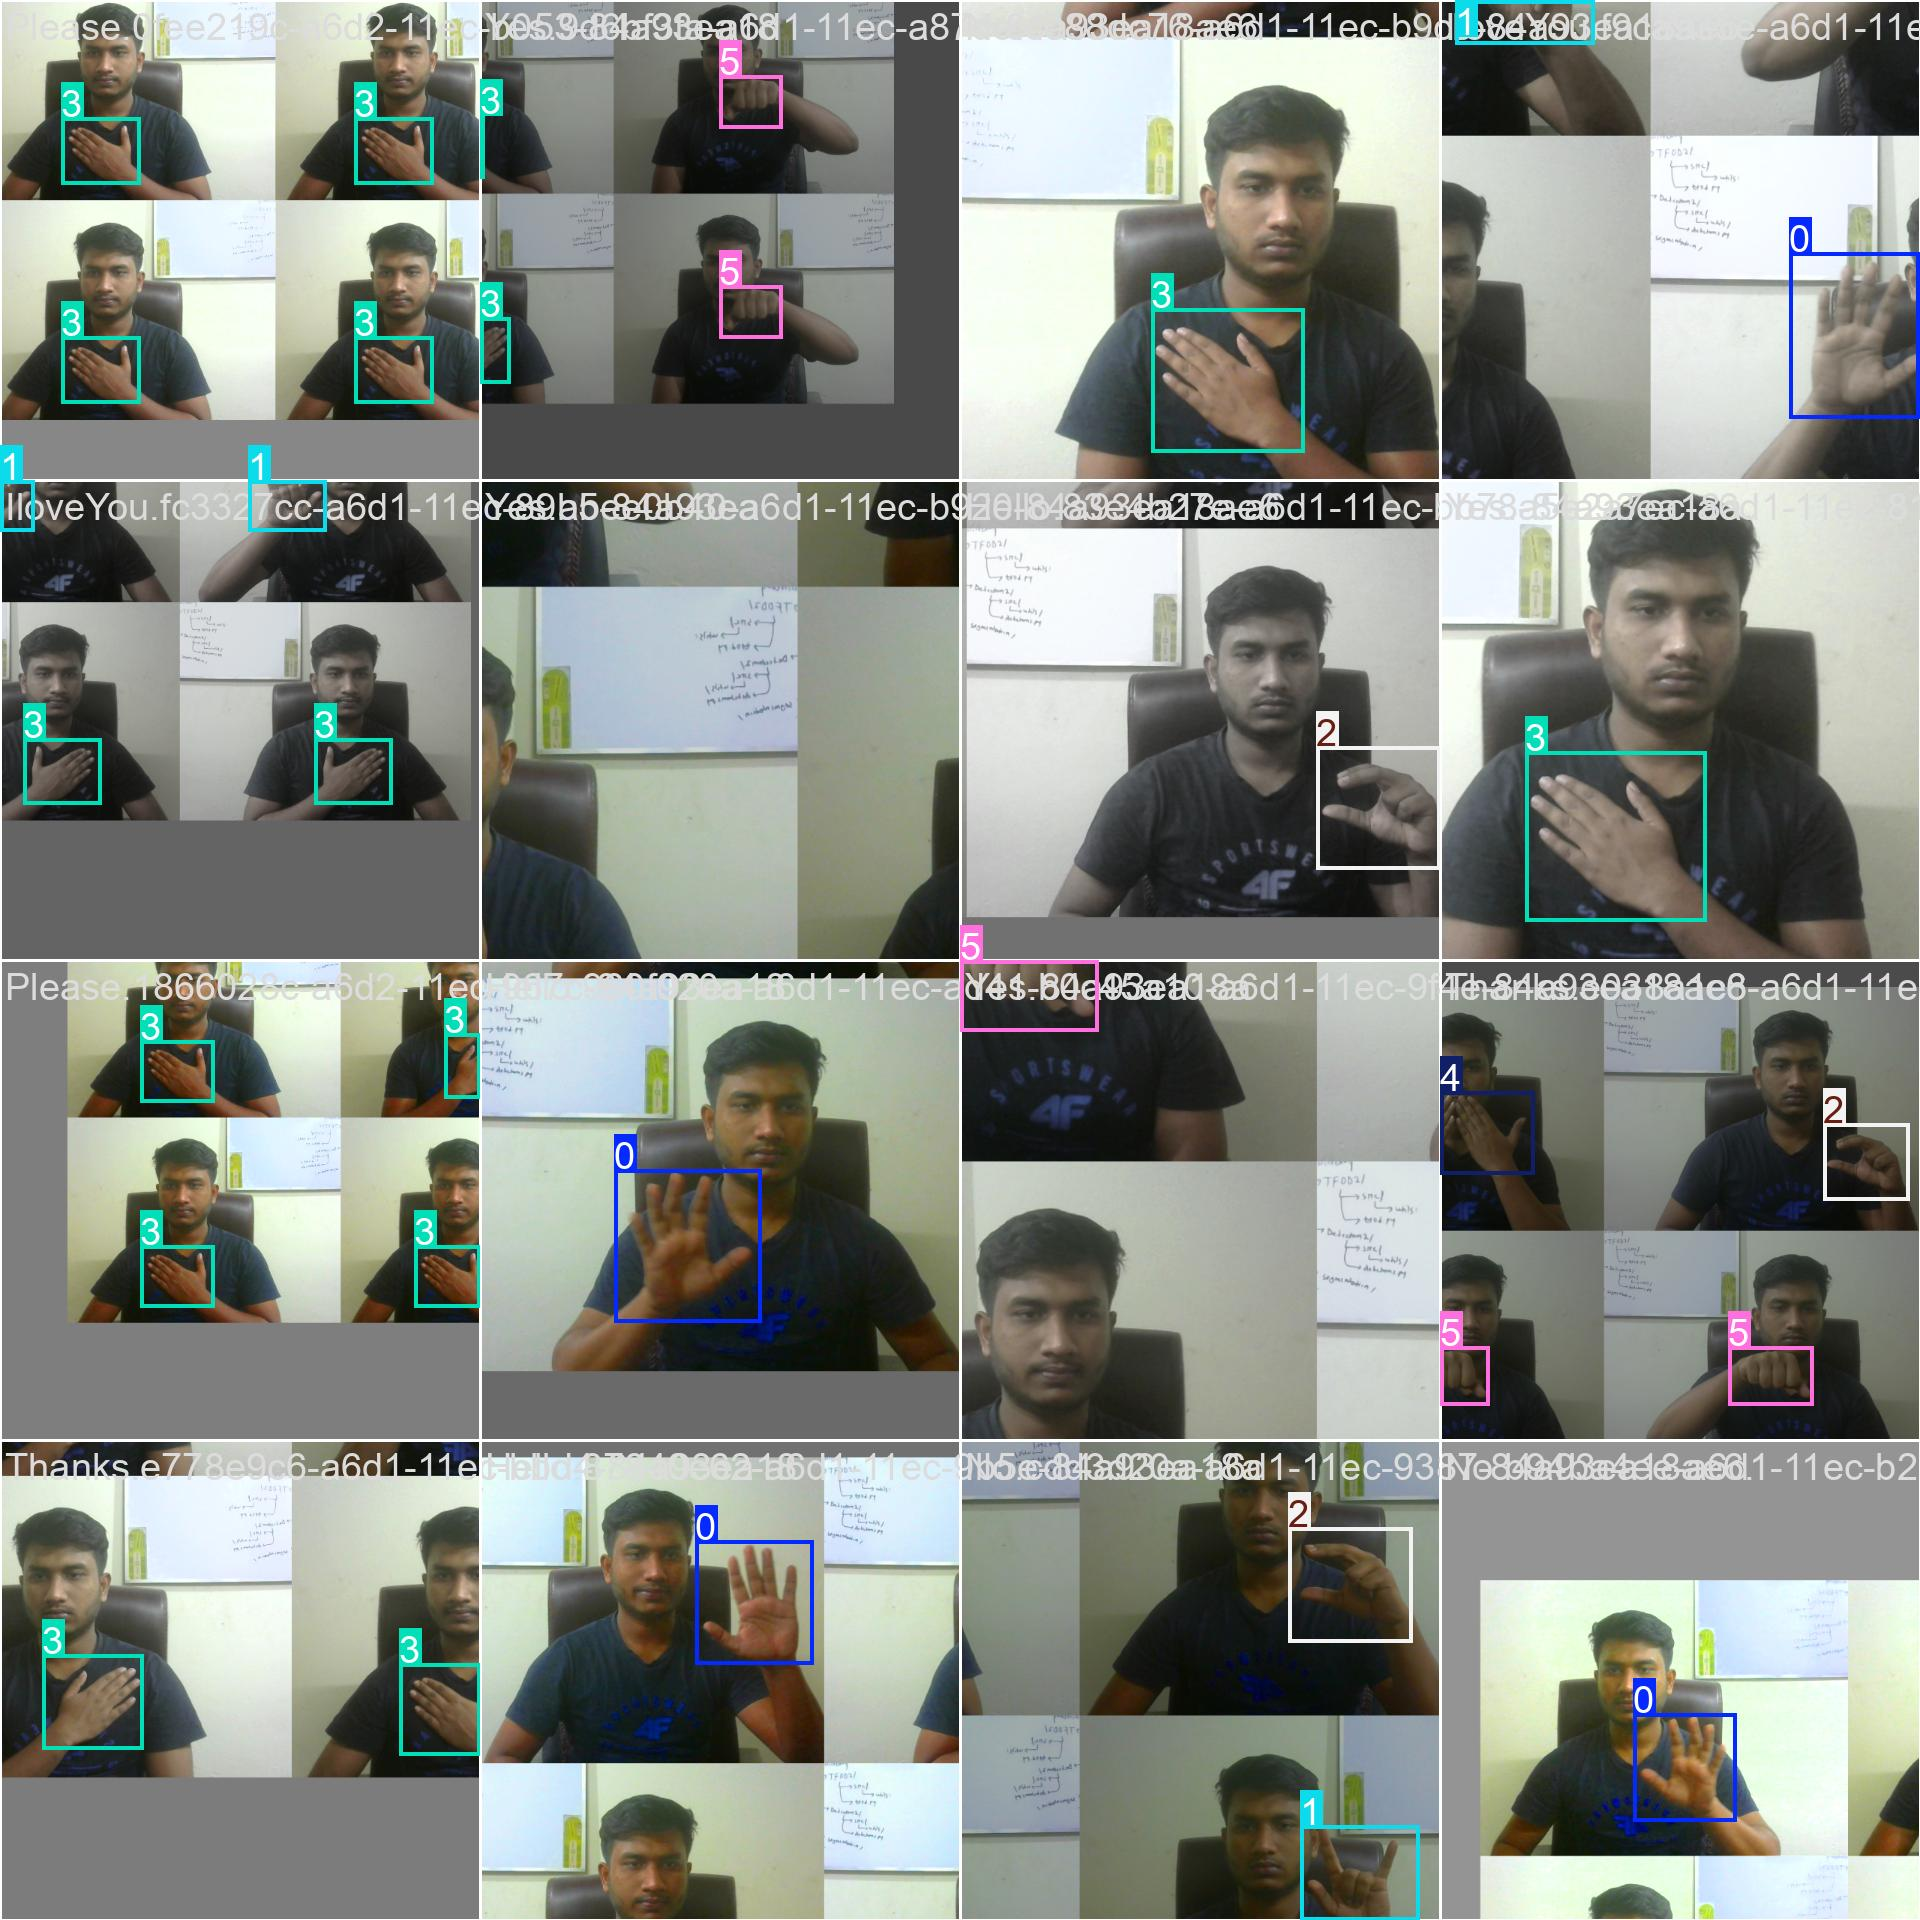

In [19]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

In [20]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/sign_data/test/images" save=True

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/30 /content/sign_data/test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg: 480x640 1 Hello, 58.3ms
image 2/30 /content/sign_data/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg: 480x640 1 Hello, 10.1ms
image 3/30 /content/sign_data/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg: 480x640 1 Hello, 8.4ms
image 4/30 /content/sign_data/test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg: 480x640 1 Hello, 9.9ms
image 5/30 /content/sign_data/test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg: 480x640 1 Hello, 9.9ms
image 6/30 /content/sign_data/test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg: 480x640 1 IloveYou, 9.1ms
image 7/30 /content/sign_data/test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg: 480x640 1 IloveYou, 8.5ms
image 8/30 /content/s

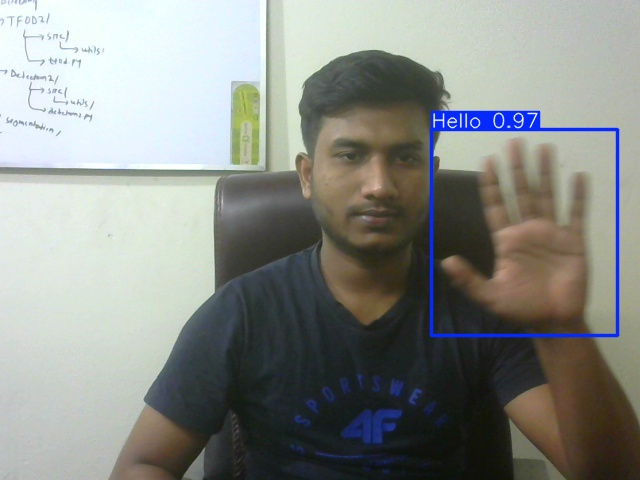

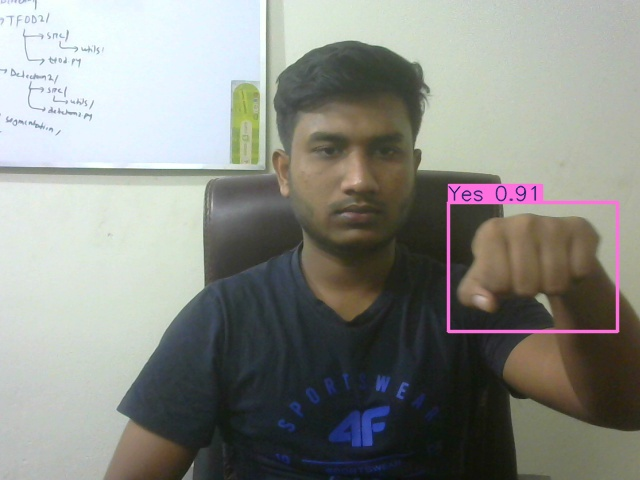

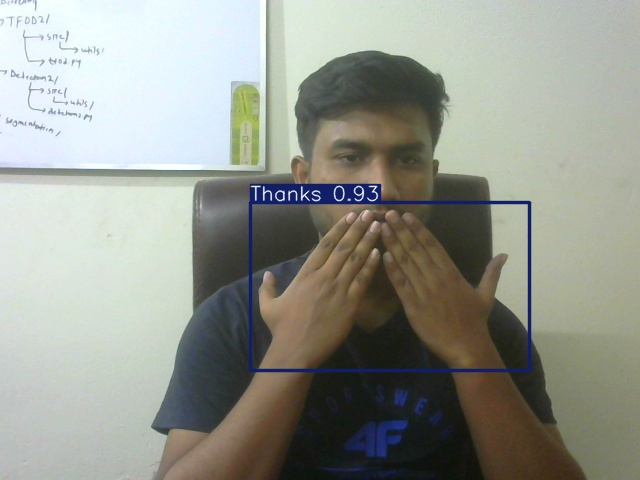

In [21]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")